# Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funções

In [2]:
# função f(x) = x²
def f(x):
    return x**2

# derivada de f(x) = x² (gradiente da função)
def fl(x):
    return 2*x

Percebe-se, abaixo, a visualização da parábola construída com a matriz criada no numpy após aplicada a função f(x) = x².

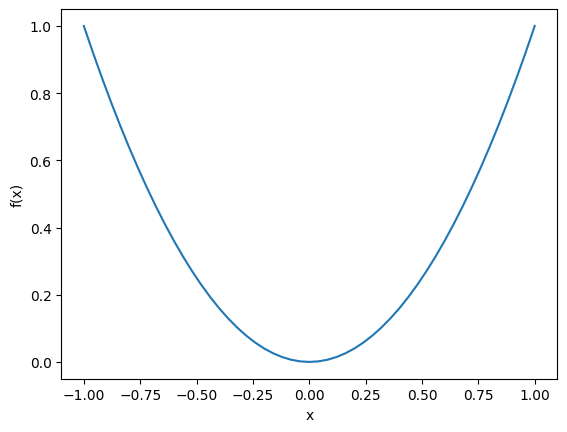

In [3]:
x_values = np.linspace(-1,1,51) # matriz

plt.plot(x_values, f(x_values))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [4]:
# matriz

x_values

array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
       -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
       -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
        0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
        0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
        0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ])

---

# Encontrando o gradiente de uma função qualquer

$x_{\text{novo}} = x_{\text{atual}} - \alpha \cdot \nabla f(x)$

In [5]:
x_guess = 0.75 # ponto inicial
max_iter = 1000 # máximo de iterações
lr = 0.1 # learning rate

x_guess_list = [x_guess]

for i in range(max_iter):
    x_guess = x_guess - lr * fl(x_guess) # derivada de x_guess
    x_guess_list.append(x_guess) 

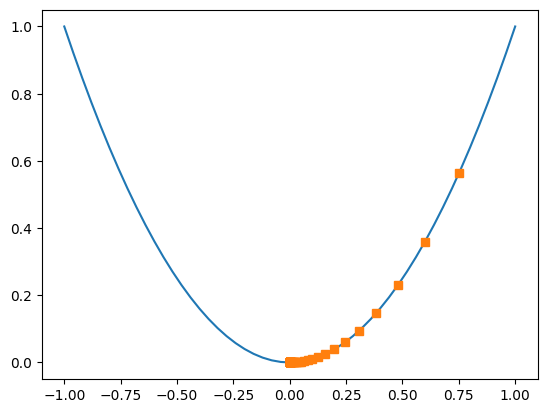

In [6]:
# visualização dos pontos

plt.plot(x_values, f(x_values))
plt.plot(x_guess_list, f(np.array(x_guess_list)), ls='', marker='s')

---

# Encontrando o gradiente da regressão

- Representação uma regressão linear simples sem intercepto

- A ideia aqui é encontrar o valor ótimo de a que minimiza o erro entre as previsões do modelo e os valores reais (y). Para isso, vamos utilizar uma função de custo (MSE), e aplicar o gradiente descendente para ajustar a.

In [7]:
def linear(x, a):
    return a*x

x = variável independente (entrada)

a = parâmetro (peso) que queremos aprender

linear(x, a) = predição do modelo

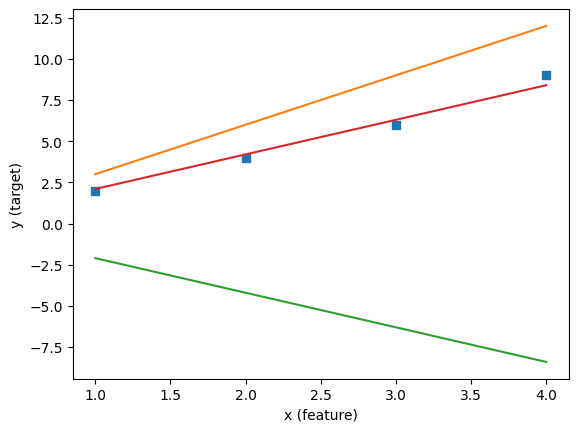

In [8]:
# matrizes
x = np.array([1,2,3,4])
y = np.array([2,4,6,9])

# testando diferentes pontos de a

plt.plot(x, y, marker='s', ls='')
plt.plot(x, linear(x, a=3.0))
plt.plot(x, linear(x, a=-2.1))
plt.plot(x, linear(x, a=2.1))
plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.show()

In [9]:
print(x)
print(y)

[1 2 3 4]
[2 4 6 9]


In [10]:
# função de custo (MSE)

def mse(a_guess):
    return np.mean((y - linear(x, a_guess))**2)

In [11]:
# gradiente da função de custo

def gradient(a_guess):
    return -2 * np.mean(x * (y - linear(x, a_guess)))

Testando as funções:

In [12]:
a_guess = -3.0 # chute
mse(a_guess)

197.75

In [13]:
a_guess = -3.0
gradient(a_guess)

-77.0

---

In [14]:
a_guess_list = np.linspace(-4,4,51) # matriz
mse_list = [mse(a_guess) for a_guess in a_guess_list] # função de custo
gradient_list = [gradient(a_guess) for a_guess in a_guess_list] # gradiente

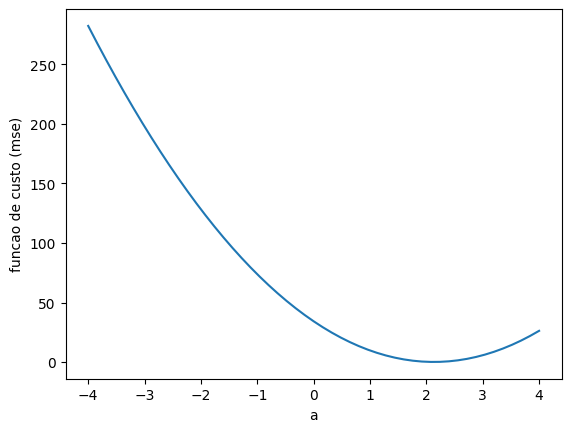

In [15]:
# Função otimizada no ponto 2

plt.plot(a_guess_list, mse_list)
# plt.plot(a_guess_list, gradient_list)
plt.xlabel('a')
plt.ylabel('funcao de custo (mse)')
plt.show()

---

In [16]:
a_guess = -4.0
max_iter = 1000
lr = 0.075

a_guess_list = [a_guess]

for i in range(max_iter):
    a_guess = a_guess - lr * gradient(a_guess)
    a_guess_list.append(a_guess)

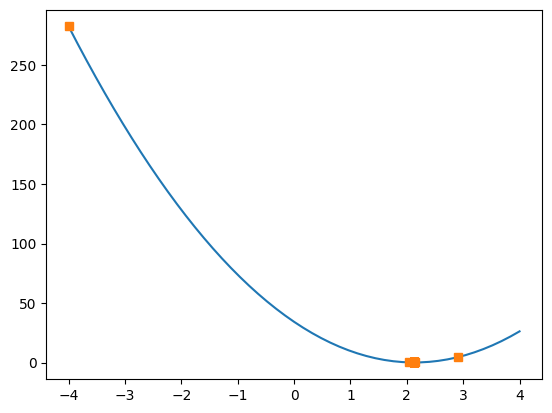

In [17]:
plt.plot(np.linspace(-4,4,51), mse_list)
plt.plot(a_guess_list, [mse(a_guess) for a_guess in a_guess_list], ls='', marker='s')

In [18]:
# a_guess_list

---

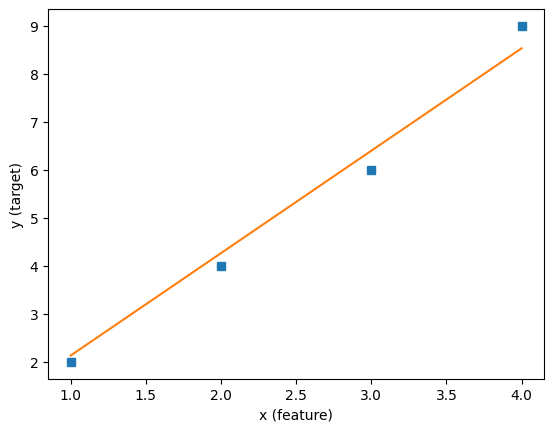

In [19]:
x = np.array([1,2,3,4])
y = np.array([2,4,6,9])

plt.plot(x, y, marker='s', ls='')
plt.plot(x, linear(x, a=a_guess_list[-1]))
plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.show()